In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()   # 载入波士顿房价数据
x = boston.data
y = boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
#这里的random_state就是为了保证程序每次运行都分割一样的训练集和测试集。否则，同样的算法模型在不同的训练集和测试集上的效果不一样
#即用来确保每次运行得到相同的准确率，可以调参

Fitting Parameters:
Intercept: 28.744950121672346 
Regression Coefficient： [-1.28899229e-01  4.62536564e-02 -5.41974027e-02  3.83208843e+00
 -1.24514995e+01  3.72790367e+00  7.37824474e-03 -1.19551784e+00
  2.80152377e-01 -7.75364999e-03 -8.27122705e-01  1.25331573e-02
 -5.56644117e-01]
Best-fit Line: Y =  28.74 + -0.13 * X1 +  0.05 * X2


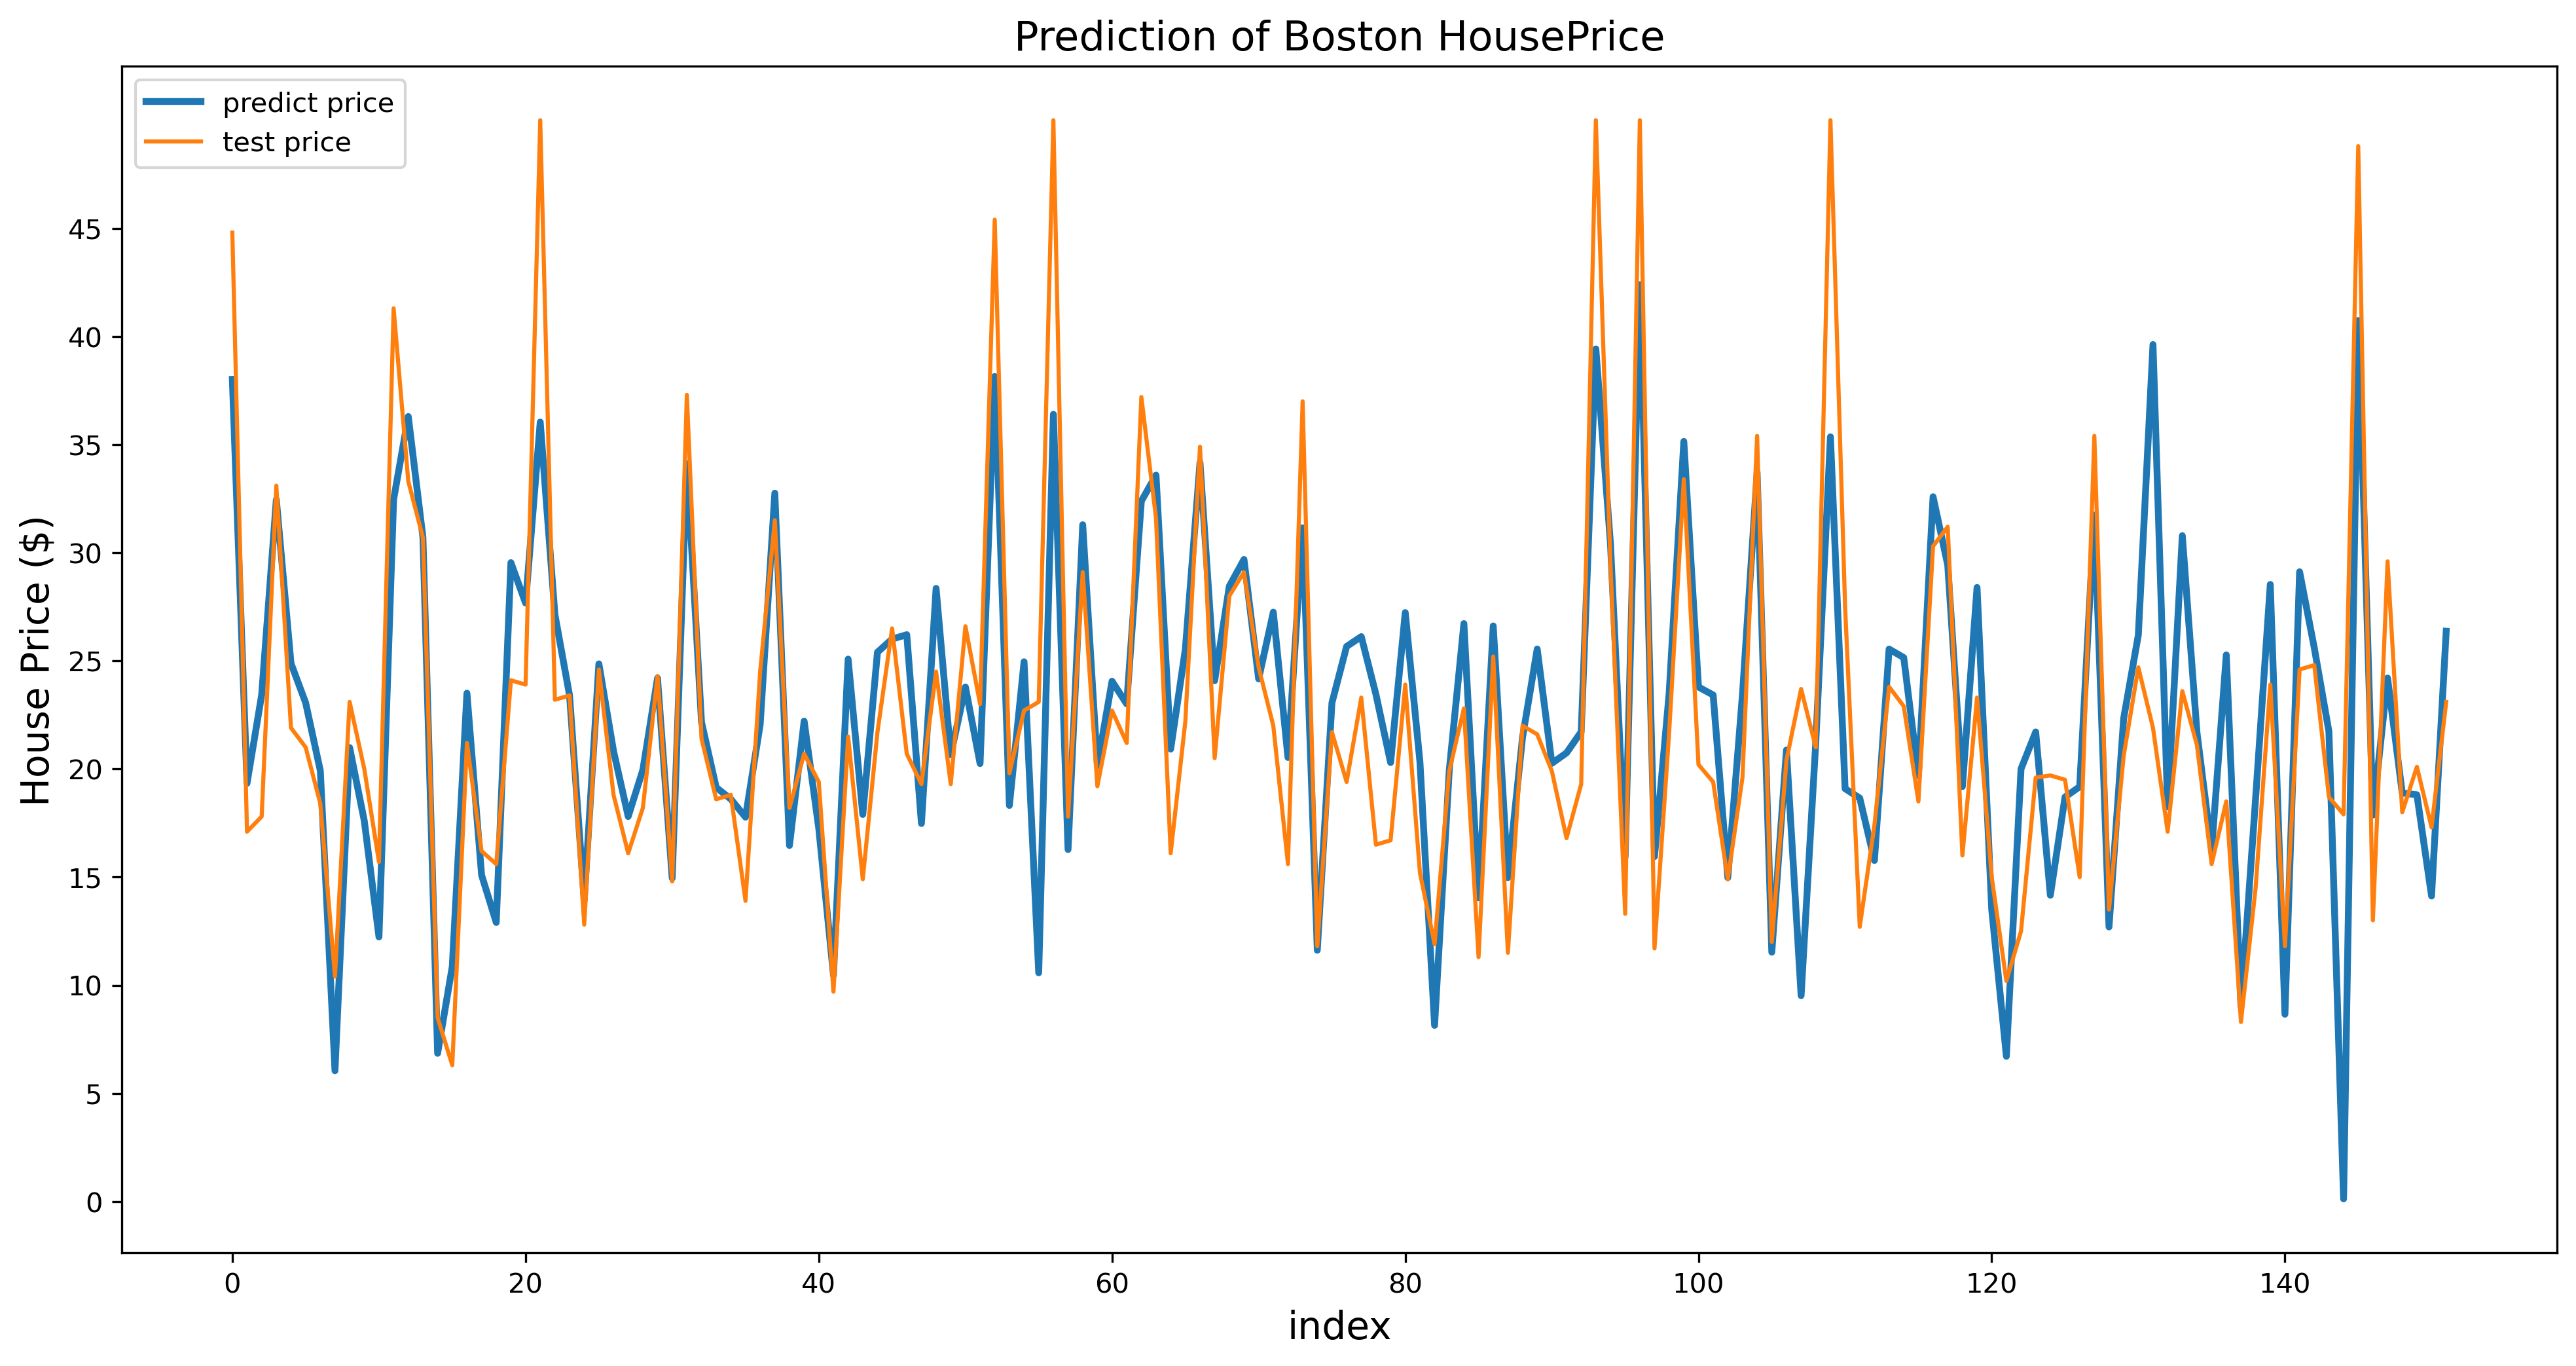

In [8]:
from sklearn.linear_model import LinearRegression
linear_r = LinearRegression()
linear_r.fit(x_train, y_train)

a  = linear_r.intercept_#截距
b = linear_r.coef_#回归系数
print("Fitting Parameters:\nIntercept:",a,"\nRegression Coefficient：",b)

#显示线性方程，并限制参数的小数位为两位
print("Best-fit Line: Y = ",round(a,2),"+",round(b[0],2),"* X1 + ",round(b[1],2),"* X2")

yli_pred = linear_r.predict(x_test)

plt.figure(figsize=(16,8),dpi=300)
plt.yticks(np.arange(0, 50, 5))
plt.ylabel('House Price ($)', fontsize=14)
plt.xlabel('index', fontsize=14)
plt.plot(range(len(yli_pred)),yli_pred, linewidth=2.5,label="predict price")
plt.plot(range(len(y_test)),y_test,label="test price")
plt.title('Prediction of Boston HousePrice', fontsize=15)
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import r2_score
score = r2_score(y_test, yli_pred)
print("SCORE:",score)

SCORE: 0.7147895265576858


In [10]:
# 求出预测值的偏差率（这个是我瞎搞的orz）
rate = abs(yli_pred-y_test)/y_test
rate

array([1.51444528e-01, 1.30570234e-01, 3.16188390e-01, 1.93961764e-02,
       1.36247104e-01, 9.80338841e-02, 8.26481882e-02, 4.18716938e-01,
       9.14045080e-02, 1.20244209e-01, 2.20805711e-01, 2.13867170e-01,
       8.99996678e-02, 4.25240876e-05, 1.94167802e-01, 7.23849669e-01,
       1.08722869e-01, 6.84148973e-02, 1.73022598e-01, 2.25745217e-01,
       1.57765347e-01, 2.79178323e-01, 1.70067621e-01, 8.06840057e-05,
       8.80389787e-02, 1.05535638e-02, 1.07760438e-01, 1.05686287e-01,
       9.66741412e-02, 4.12396322e-03, 9.94199850e-03, 8.53477930e-02,
       3.58555923e-02, 2.93184305e-02, 1.03199531e-02, 2.78489524e-01,
       1.00176759e-01, 3.98103633e-02, 9.54989219e-02, 7.30172280e-02,
       1.11275103e-01, 7.84049377e-02, 1.66491077e-01, 2.01060416e-01,
       1.70435319e-01, 1.86086129e-02, 2.66119439e-01, 9.44433456e-02,
       1.57153408e-01, 7.02408700e-02, 1.05674433e-01, 1.19607316e-01,
       1.59719138e-01, 7.51057369e-02, 9.94115087e-02, 5.42175936e-01,
      

In [11]:
# np.equal可以比较两个数组中的每一项,返回True/False数组
# np.count_nonzero()统计其中True的数目,也就是预测符合我们预期的样本数（假设偏差率小于0.1就符合我们的预期了）
print('Satisfactory predictions:','%d/%d' % (np.count_nonzero(rate<0.1),y_test.shape[0]))

Satisfactory predictions: 68/152
